In [31]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

In [32]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


In [33]:
# copy to a new dataframe
df_gdp = dfLE.copy()
df_gdp.head(10)

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.3750,92.3750,1.641579e+11,2.012120e+07,16.50625
6,Armenia,0.0,73.40000,117.3750,1.0000,3.702667,87.562500,274.2500,44.70625,1.0000,89.1250,87.3750,2.901137e+09,1.015165e+06,11.78750
7,Australia,1.0,81.81250,63.1875,1.0000,10.155333,93.400000,103.9375,55.86250,1.3750,86.7500,86.8750,2.905302e+11,4.587010e+06,20.03750
8,Austria,1.0,81.48125,65.7500,0.0000,12.236000,81.062500,77.2500,48.28750,0.0000,86.0000,86.7500,2.259544e+11,6.474880e+06,15.38750
9,Azerbaijan,0.0,70.73125,115.1875,6.0625,0.992000,59.214286,598.1875,43.84375,7.1875,75.8125,82.3125,6.669684e+09,2.157370e+06,11.35000


In [34]:
#Part 1
df_gdp['GDP_capita'] = df_gdp['GDP'] / df_gdp['Population']
df_gdp['GDP_capita'].sample(10)

175     3331.124773
183     7304.866699
97     10202.508623
35      3255.794119
92     10334.929688
151      256.516755
153             NaN
7      63337.610450
71      1467.352411
70       367.528747
Name: GDP_capita, dtype: float64

In [35]:
# try use population / gdp

df_gdp['GDP_capita2'] = df_gdp['GDP'] / (df_gdp['Population'] - df_gdp['Schooling'])
df_gdp['GDP_capita2'].sample(10)

29       618.151362
174     2942.062082
22      5947.345835
104    10304.035589
179             NaN
31       378.778517
158      511.631137
117      441.919842
110     2113.197110
5       8158.461254
Name: GDP_capita2, dtype: float64

In [36]:
df_gdp['GDP_capita2'].head(5)

0     414.824468
1    1674.470310
2    3392.914321
3    2146.265423
4            NaN
Name: GDP_capita2, dtype: float64

In [37]:
df_gdp.head(5)

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_capita,GDP_capita2
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250,414.824126,414.824468
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750,1674.441147,1674.470310
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250,3392.912329,3392.914321
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375,2146.263722,2146.265423
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375,NaN,NaN


In [38]:
GDP_capita_final = df_gdp['GDP_capita2']

In [39]:
GDP_capita_final = GDP_capita_final.apply(lambda x:x * 1000000)
GDP_capita_final


0      4.148245e+08
1      1.674470e+09
2      3.392914e+09
3      2.146265e+09
4               NaN
           ...     
186             NaN
187             NaN
188             NaN
189    7.874019e+08
190    4.204196e+08
Name: GDP_capita2, Length: 191, dtype: float64

In [40]:
GDP_capita_final = GDP_capita_final.dropna()

In [41]:
# delete all NaN data in GDP_capita column.
df_gdp = df_gdp.dropna()
df_gdp.describe()

,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_capita,GDP_capita2
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,1.330000e+02,1.330000e+02,133.000000,133.000000,133.000000
mean,0.142857,68.139709,174.300282,35.902726,4.436893,77.272061,2657.467105,36.691964,49.817199,80.572006,80.699919,6.023285e+10,1.340066e+07,11.691823,5831.130877,5831.554334
std,0.351250,9.254200,97.065845,133.819254,3.736886,17.174868,8473.612218,15.971021,181.414641,15.732438,16.431339,1.506979e+11,3.972571e+07,3.006460,10101.737928,10102.072890
min,0.000000,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,12.875000,0.000000,32.875000,26.812500,8.988098e+06,3.334250e+03,4.018750,117.466394,117.466619
25%,0.000000,60.862500,114.312500,0.687500,1.074667,66.500000,15.125000,19.293750,1.000000,69.625000,70.500000,1.213512e+09,1.007302e+06,9.868750,685.958218,685.962195
50%,0.000000,70.731250,154.312500,3.312500,3.807333,79.600000,251.937500,39.743750,4.000000,84.375000,84.500000,6.161290e+09,3.735507e+06,12.000000,2306.960717,2306.969226
75%,0.000000,74.262500,227.750000,23.250000,7.130000,91.812500,1880.812500,50.893750,35.562500,94.812500,95.000000,2.698236e+10,1.124072e+07,13.725000,5490.517494,5490.531737
max,1.000000,82.518750,550.062500,1366.687500,13.497333,98.875000,65857.937500,69.431250,1812.500000,98.562500,98.937500,1.004677e+12,4.214677e+08,20.037500,63337.610450,63337.887130


In [42]:
GDP_capita_final.head()

0    4.148245e+08
1    1.674470e+09
2    3.392914e+09
3    2.146265e+09
5    8.158461e+09
Name: GDP_capita2, dtype: float64

In [43]:
hist_gdp = thinkstats2.Hist(df_gdp['GDP_capita'], label = 'GDP_capita')

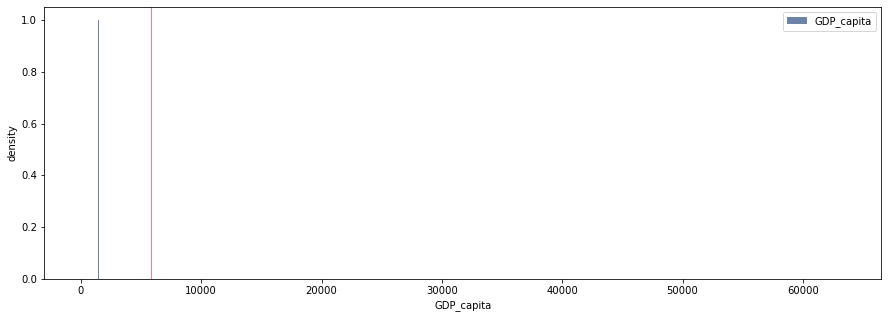

In [44]:
thinkplot.Hist(hist_gdp)
thinkplot.Config(xlabel='GDP_capita', ylabel='density')
thinkplot.axvline(np.mean(hist_gdp), color="red")

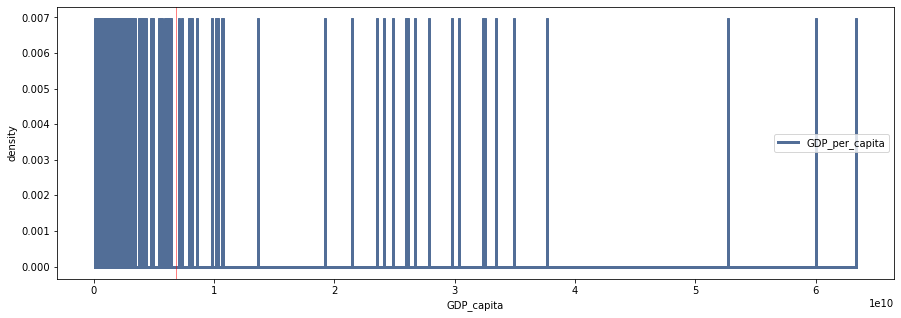

In [45]:
pmf_gdp = thinkstats2.Pmf(round(GDP_capita_final)-3, label = 'GDP_per_capita')

thinkplot.Pmf(pmf_gdp)
thinkplot.Config(xlabel='GDP_capita', ylabel='density')
thinkplot.axvline(np.mean(pmf_gdp), color="red")

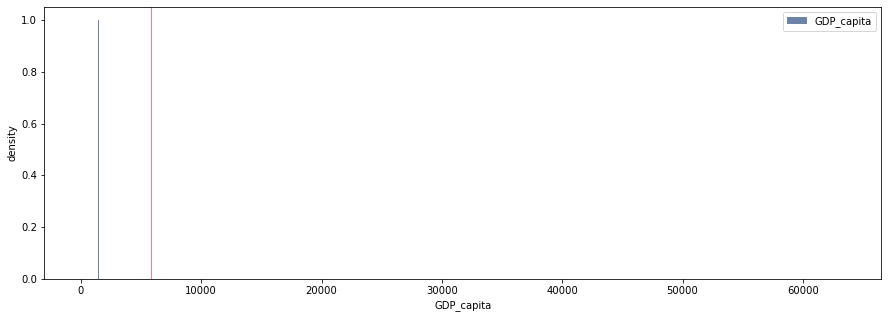

In [46]:
thinkplot.Hist(hist_gdp)
thinkplot.Config(xlabel='GDP_capita', ylabel='density')
thinkplot.axvline(np.mean(hist_gdp), color="red")

0     414.824468
1    1674.470310
2    3392.914321
3    2146.265423
5    8158.461254
Name: GDP_capita2, dtype: float64

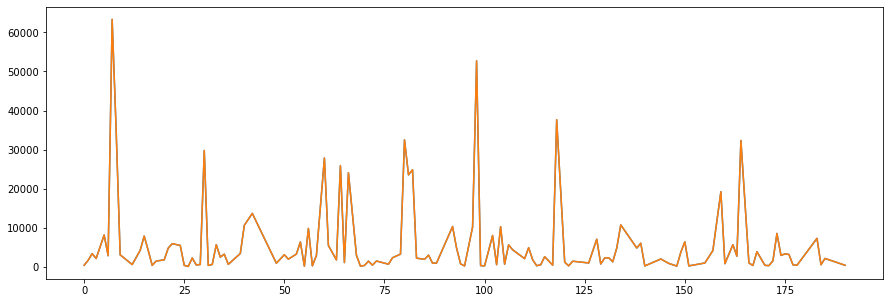

In [47]:
# now this GDP_capita data has some unusual data.
GDP_capita_final = df_gdp['GDP_capita']
GDP_capita_final = GDP_capita_final.apply(lambda x:x * 1000000)
GDP_capita_final

plt.plot(df_gdp['GDP_capita'])
df_gdp['GDP_capita'].head(5)



plt.plot(df_gdp['GDP_capita2'])
df_gdp['GDP_capita2'].head(5)

In [48]:
#Print all distributions
# create a function for all distributions
def all_graphs(df_name, column_name):
    data = pd.Series(df_name[column_name])
    hist = thinkstats2.Hist(data) 
    pmf = thinkstats2.Pmf(data) 
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data)
    thinkplot.PrePlot(6, rows = 2, cols = 3) 
    thinkplot.Hist(hist) 
    thinkplot.SubPlot(2) 
    thinkplot.Pmf(pmf) 
    thinkplot.SubPlot(3)
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4)
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5)
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6)
    thinkplot.Pdf(pdf)
    thinkplot.Config()
    return

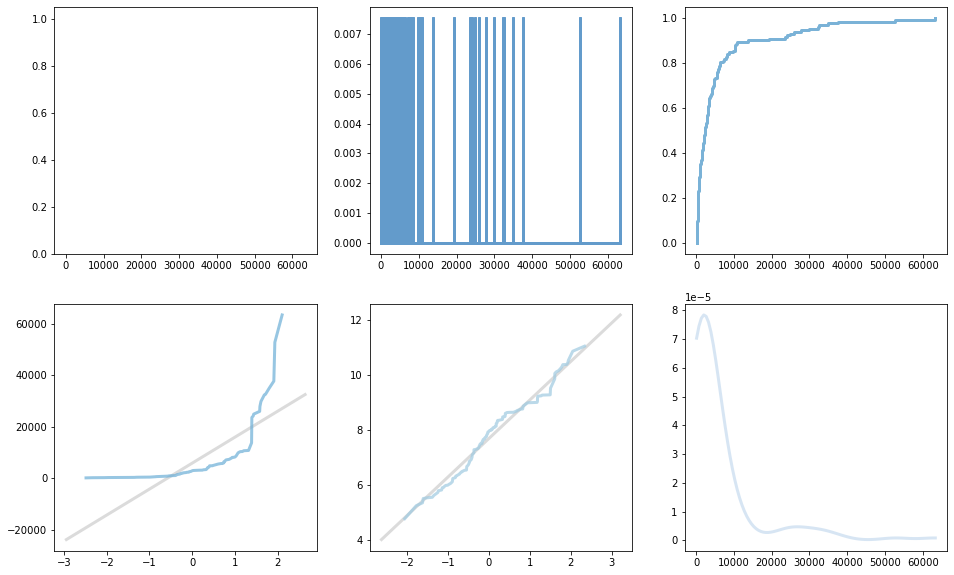

In [49]:
#graphing
all_graphs(df_gdp,'GDP_capita2')

In [50]:
#Print all distributions
# create a function for all distributions

def all_graphs(df_name, column_name):
    data = pd.Series(df_name[column_name])
    hist = thinkstats2.Hist(data) 
    pmf = thinkstats2.Pmf(data) 
    cdf = thinkstats2.Cdf(data)
    pdf = thinkstats2.EstimatedPdf(data)
    thinkplot.PrePlot(6, rows = 2, cols = 3) 
    thinkplot.Hist(hist) 
    thinkplot.SubPlot(2) 
    thinkplot.Pmf(pmf) 
    thinkplot.SubPlot(3)
    thinkplot.Cdf(cdf)
    thinkplot.SubPlot(4)
    thinkstats2.NormalProbabilityPlot(data)
    thinkplot.SubPlot(5)
    thinkstats2.NormalProbabilityPlot(np.log(data))
    thinkplot.SubPlot(6)
    thinkplot.Pdf(pdf)
    thinkplot.Config()
    return

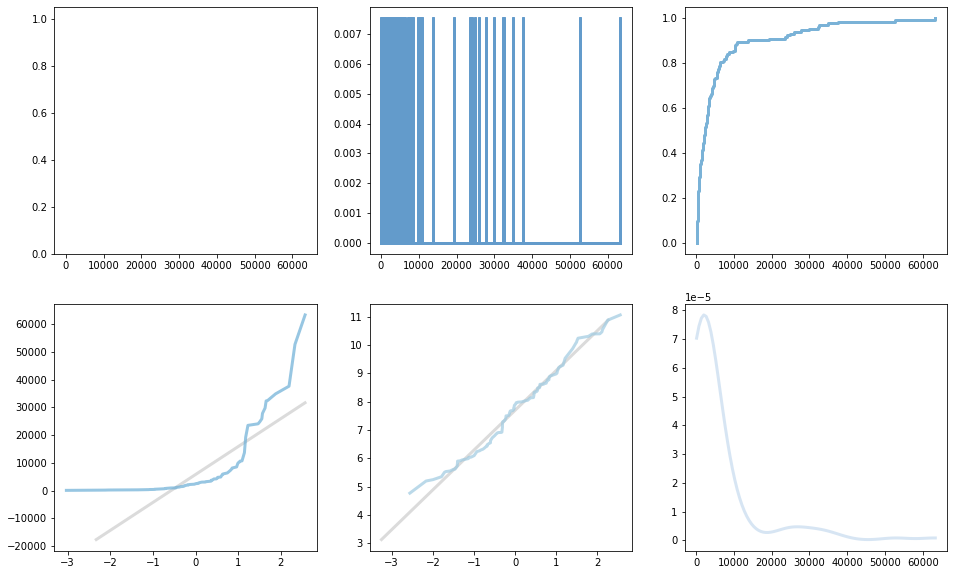

In [51]:
#graphing
all_graphs(df_gdp,'GDP_capita')

<AxesSubplot:ylabel='Density'>

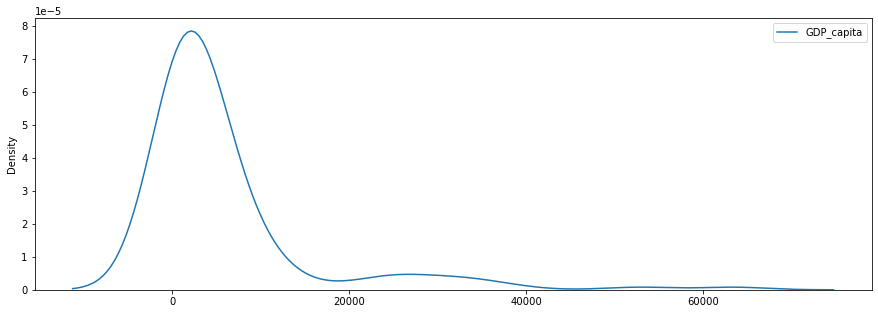

In [52]:
kde_capita = df_gdp[['GDP_capita']]
sns.kdeplot(data = kde_capita)


{'xscale': 'linear', 'yscale': 'linear'}

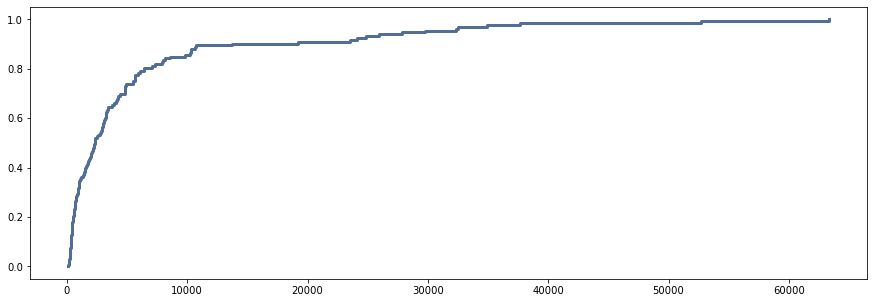

In [53]:
cdf_capita = thinkstats2.Cdf(df_gdp['GDP_capita'])
thinkplot.Cdf(cdf_capita)

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

In [57]:
# create a new dataframe for schooling in Canada
df_schooling = pd.read_csv('led.csv')
df_schooling = df_schooling[['Country', 'Year', 'Schooling']]

In [55]:
filter = df_schooling['Country'] == 'Canada'
df_schooling[filter]

NameError: name 'df_schooling' is not defined

In [58]:
filter = df_schooling['Country'] == 'Canada'
df_schooling[filter]

,Country,Year,Schooling
496,Canada,2015,16.3
497,Canada,2014,15.9
498,Canada,2013,15.9
499,Canada,2012,15.9
500,Canada,2011,15.9
501,Canada,2010,15.9
502,Canada,2009,15.9
503,Canada,2008,15.8
504,Canada,2007,15.8
505,Canada,2006,15.8


In [ ]:
# the percentage of that have a schooling level within 1 year of Canada. 
percent_educate = df_schooling.mean() / 16 * 100
print('the precentage of schooling level of Canada: %.2f' % percent_educate['Schooling'], '%')

the precentage of schooling level of Canada: 75.01 %


C:\Users\Elsa\AppData\Local\Temp\ipykernel_8652\2352253575.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  percent_educate = df_schooling.mean() / 16 * 100


In [ ]:
# Do a little manipulation to get the data only for Canada

df_schooling['diff'] = pd.Series(np.diff(df_schooling['Schooling']))
df_schooling['return'] = df_schooling['diff'] / df_schooling['Schooling']
df_schooling.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,diff,return
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,1.971086e+10,33736494.0,17.2,17.3,0.479,10.1,-0.1,-0.009901
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,2.007083e+08,327582.0,17.5,17.5,0.476,10.0,-0.1,-0.010000
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,2.004633e+10,31731688.0,17.7,17.7,0.470,9.9,-0.1,-0.010101
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,2.476810e+09,3696958.0,17.9,18.0,0.463,9.8,-0.3,-0.030612
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,1.892519e+08,2978599.0,18.2,18.2,0.454,9.5,-0.3,-0.031579


In [ ]:
#Creating a Function.
def normal_dist(x, mean, std):
    prob_density = (np.pi * std) * np.exp( -0.5 * ((x - mean)/std) **2 )
    return prob_density

Text(0, 0.5, 'Probability Density')

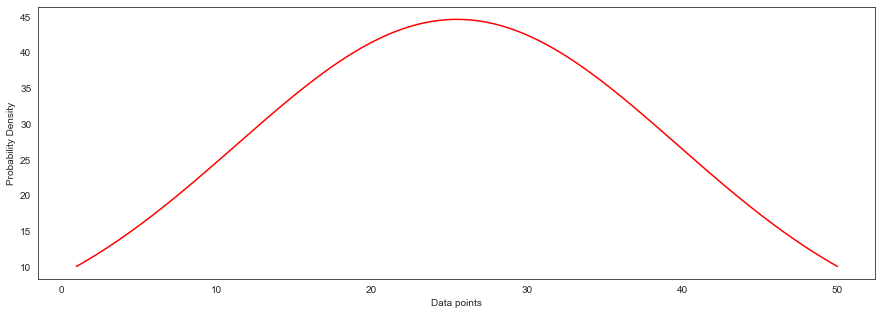

In [ ]:
#Calculate mean and Standard deviation.
mean_schooling = np.mean(x)
std_schooling = np.std(x)
 
#Apply function to the data.
pdf = normal_dist(x, mean_schooling, std_schooling)
 
#Plotting the Results
plt.plot(x, pdf, color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

In [ ]:
df_gdp['Schooling'].describe()

count    133.000000
mean      11.691823
std        3.006460
min        4.018750
25%        9.868750
50%       12.000000
75%       13.725000
max       20.037500
Name: Schooling, dtype: float64

In [ ]:
# use the number of second quortile to draw 
dschool = df_gdp[df_gdp['Schooling'] > 12.0]
dnschool = df_gdp[df_gdp['Schooling'] < 12.0]

ds_life = dschool.Lifeexpectancy
dns_life = dnschool.Lifeexpectancy

<AxesSubplot:xlabel='Lifeexpectancy', ylabel='Density'>

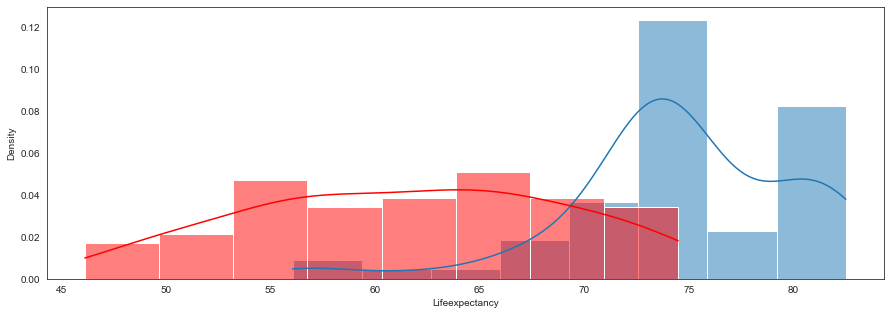

In [ ]:
# Plot the emperical data with analytical distribution.
sns.histplot(ds_life, kde=True, stat="density")
sns.histplot(dns_life, kde=True, stat="density", color='red')

0     8.21250
1    12.13750
2    12.71250
3     8.04375
5    16.50625
Name: Schooling, dtype: float64

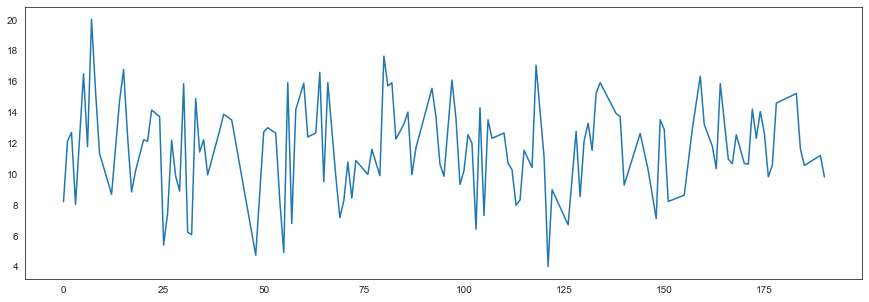

In [ ]:
schooling_graph = df_gdp['Schooling']  # delete

plt.plot(df_gdp['Schooling'])
df_gdp['Schooling'].head(5)

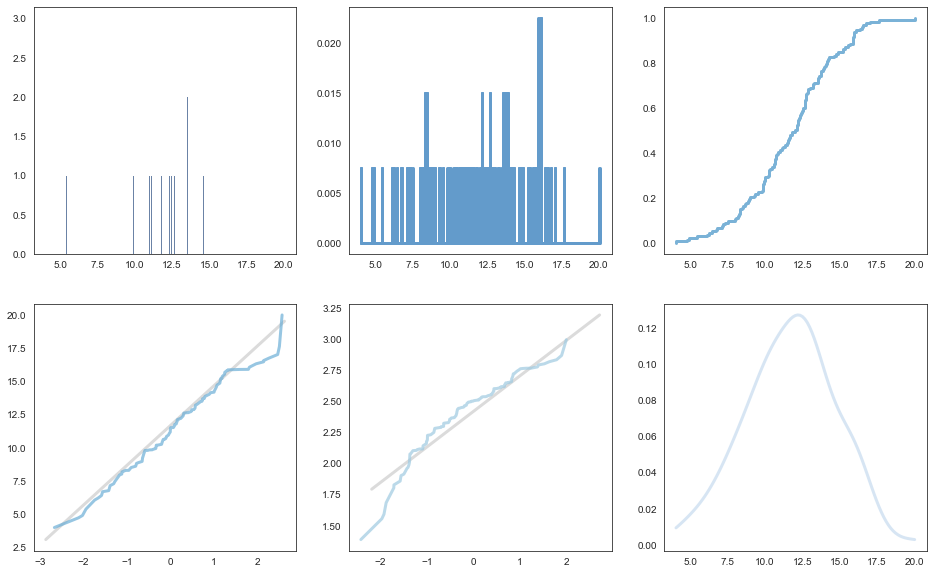

In [ ]:
#Analytical for Schooling - 1 
# the schooling data seems more close to normal than GDP capita data.
all_graphs(df_gdp, 'Schooling')

In [ ]:
#Analytical for Schooling - 2
# the mean is 11.69 and standard deviation is 3.00, which Schooling values are closer to the average.
# use Schooling data is more accuate than GDP_capita.
df_gdp['Schooling'].describe()

count    133.000000
mean      11.691823
std        3.006460
min        4.018750
25%        9.868750
50%       12.000000
75%       13.725000
max       20.037500
Name: Schooling, dtype: float64

c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


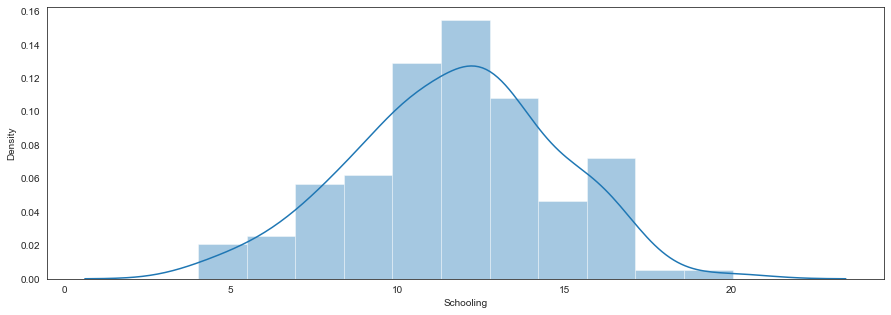

In [ ]:
sns.distplot(df_gdp['Schooling'])
plt.show()
sns.set_style('white')

In [ ]:
#Get some basic brain stats and save them in varaibles.
#mean, standard dev, median, and count. 
mean_school = df_gdp['Schooling'].mean()
med_school = df_gdp['Schooling'].median()
std_school = df_gdp['Schooling'].std()
num_school = df_gdp['Schooling'].count()

print('mean: ', mean_school)
print('median: ', med_school)
print('std: ', std_school)
print('count: ', num_school)

mean:  11.691823308270681
median:  12.0
std:  3.0064598793967483
count:  133


In [ ]:
#Exponential simulator
# a new function for simulator
from sklearn.metrics import mean_squared_error

def simulate_emp(mean = 0, n = 100, m = 10000, ciLow = 5, ciHi = 95):
    means = []
    for j in range(m):
        xs = np.random.exponential(1/mean,n)
        xbar = 1/np.mean(xs)
        means.append(xbar)
    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi)
    rateList = [mean] * m
    stderr = mean_squared_error(means, rateList, squared=False)
    return cdf, ci, stderr

Standard Error: 1.1067692929078143
Low CI: 9.723521410320798
Hi CI: 13.972958117172752
Estimate: 11.630670321547946


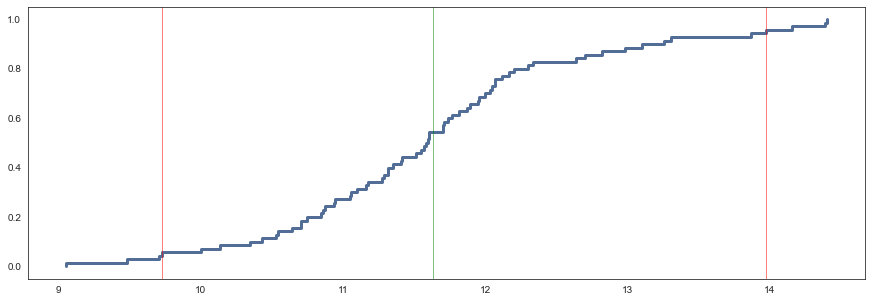

In [ ]:
 # emperical data on the same graph as the analytical distribution. 

cdf, ci, stderr = simulate_emp(mean = mean_school, n = num_school, m=70, ciLow=5, ciHi=95)
print("Standard Error:", stderr)
print("Low CI:", ci[0])
print("Hi CI:", ci[1])
print("Estimate:", cdf.Mean())
thinkplot.Cdf(cdf)
thinkplot.axvline(cdf.Mean(), color="green")
thinkplot.axvline(ci[0], color="red")
thinkplot.axvline(ci[1], color="red")

In [ ]:
# percentage of schooling level in Canada. 
# schooling people / population


In [ ]:
df_gdp['percent_educate'] = df_gdp['Schooling'] / df_gdp['Population'] * 100
print(df_gdp[df_gdp['Country'].isin(['Canada'])])

   Country  isDeveloped  Lifeexpectancy  AdultMortality  infantdeaths  \
30  Canada          0.0         81.6875          64.625           2.0   

     Alcohol  HepatitisB  Measles      BMI  under-fivedeaths    Polio  \
30  8.053333   28.846154    129.5  55.8625               2.0  85.3125   

    Diphtheria           GDP    Population  Schooling    GDP_capita  \
30     91.0625  3.384881e+11  1.136405e+07     15.875  29785.859548   

     GDP_capita2  percent_educate  
30  29785.901157          0.00014  


c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


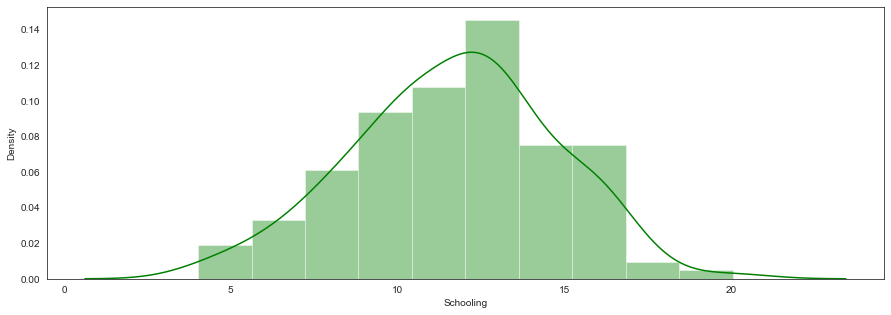

In [ ]:
sns.distplot(df_gdp['Schooling'], color = 'green', bins= 10)
plt.show()

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 

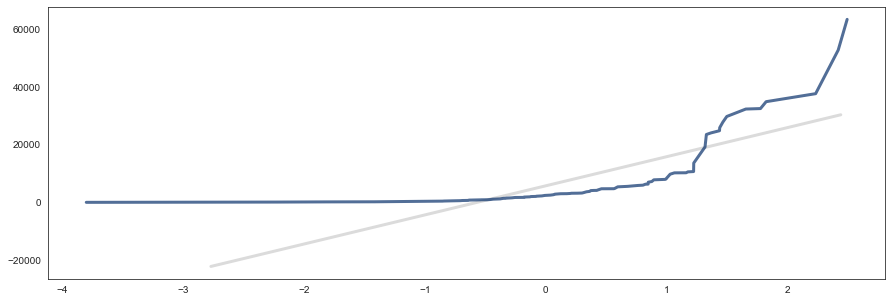

In [ ]:
# thinkstats2.NormalProbabilityPlot(cdf_capita)
thinkstats2.NormalProbabilityPlot(df_gdp['GDP_capita2'])

c:\Users\Elsa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


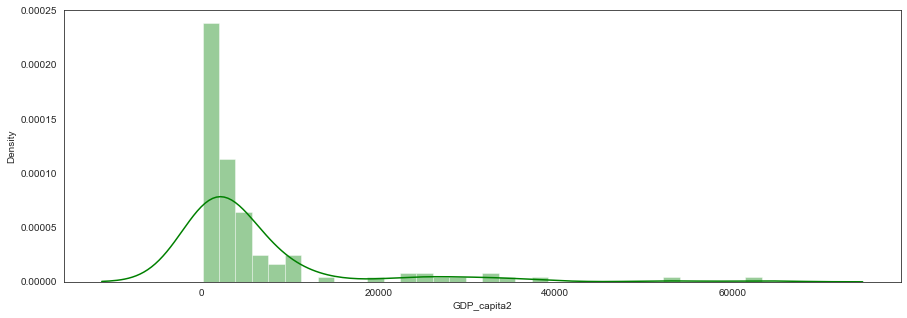

In [ ]:
# use another analytical distribution to look at the GDP_capita data.
sns.distplot(df_gdp['GDP_capita2'], color="green")
plt.show()

In [ ]:
dfLE = pd.read_csv("led.csv")
drop_cap = df_gdp.drop(columns=['GDP_capita2'])
drop_cap.head()

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_capita,percent_educate
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.375,52.3125,4.136734e+09,9.972260e+06,8.21250,414.824126,0.000082
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.125,98.0625,1.166938e+09,6.969116e+05,12.13750,1674.441147,0.001742
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.750,91.8750,7.345597e+10,2.164983e+07,12.71250,3392.912329,0.000059
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.125,47.6875,2.177835e+10,1.014710e+07,8.04375,2146.263722,0.000079
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.375,92.3750,1.641579e+11,2.012120e+07,16.50625,8158.454561,0.000082


### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

In [ ]:
#Visualize correlations. 
# create a dataframe for country is developed and is not developed.
df_dev = df_gdp[df_gdp['isDeveloped'] == 1]
df_ndev = df_gdp[df_gdp['isDeveloped'] == 0]
df_ndev.shape
dlife_dev = df_dev.Lifeexpectancy
dlife_ndev = df_ndev.Lifeexpectancy


In [ ]:
# show the mean of two type of countries.
df_dev_gdp = df_gdp.loc[df_gdp['isDeveloped'] == 1, 'GDP']
print('the mean of the countries are developed: ', '%15.2f' %df_dev_gdp.mean())

df_ndev_gdp = df_gdp.loc[df_gdp['isDeveloped'] == 0, 'GDP']
print('the mean of the countries are not developed: ', '%15.2f' %df_ndev_gdp.mean())

the mean of the countries are developed:  191219173390.69
the mean of the countries are not developed:   38401794448.73


<AxesSubplot:xlabel='GDP', ylabel='Density'>

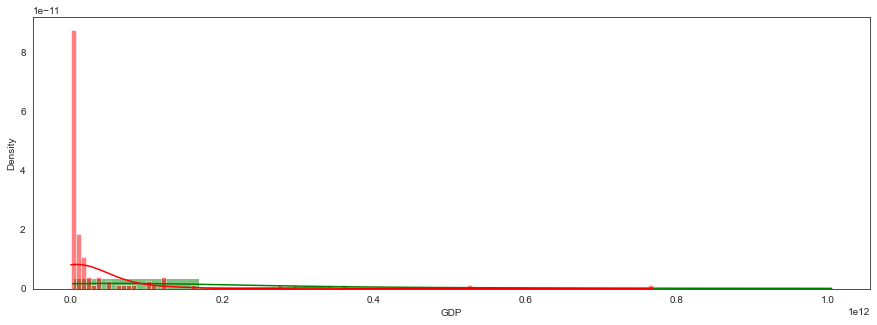

In [ ]:
# plot the data
sns.histplot(df_dev_gdp, kde = True, stat = "density", color = 'green')
sns.histplot(df_ndev_gdp, kde = True, stat = "density", color = 'red')

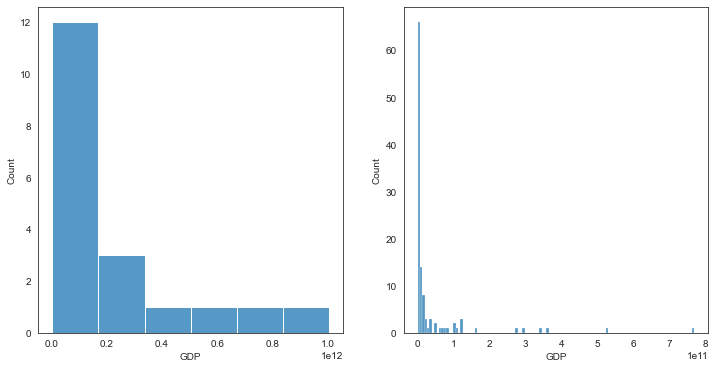

In [ ]:
#Plot the means of the above distributions
#sns.kdeplot(means, linestyle="dotted")
thinkplot.PrePlot(2,1,2)
sns.histplot(df_dev_gdp)
thinkplot.SubPlot(2)
sns.histplot(df_ndev_gdp)
thinkplot.Config()

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [ ]:
# developed countries.

#Get some basic stats and save them in varaibles.
#mean, standard dev, median, and count. 
dfmean_dev = df_dev_gdp.mean()
dfmed_dev = df_dev_gdp.median()
dfstd_dev = df_dev_gdp.std()
dfn_dev = df_dev_gdp.count()

print("Mean:", dfmean_dev)
print("median:", dfmed_dev)
print("Standard Deviation:", dfstd_dev)
print("Count:", dfn_dev)

NameError: name 'df_dev_gdp' is not defined

In [ ]:
# non-developed countries
dfmean_ndev = df_ndev_gdp.mean()
dfmed_ndev = df_ndev_gdp.median()
dfstd_ndev = df_ndev_gdp.std()
dfn_ndev = df_ndev_gdp.count()

print("Mean:", dfmean_ndev)
print("median:", dfmed_ndev)
print("Standard Deviation:", dfstd_ndev)
print("Count:", dfn_ndev)


Mean: 38401794448.7334
median: 3939109674.197054
Standard Deviation: 104873088330.11647
Count: 114


In [ ]:
# create a dataframe for country is developed and non-developed.
df_dev = df_gdp[df_gdp['isDeveloped'] == 1]
df_ndev = df_gdp[df_gdp['isDeveloped'] == 0]


In [ ]:
# for developed countries, the strongest correlations with Life expectancy are: Adult Mortality, GDP, GDP_capita.
df_dev_corr = df_dev.corr()
df_dev_corr

NameError: name 'df_dev' is not defined

In [ ]:
# for non-developed countries, the strongest correlations with Life expectancy are: Adult Mortality, BMI, Schooling.
df_ndev_corr = df_ndev.corr()
df_ndev_corr

NameError: name 'df_ndev' is not defined

In [ ]:
# heatmap for developed countries.
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(df_dev_corr, dtype=bool))
sns.heatmap(df_dev_corr, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True)
plt.show()

In [ ]:
# heatmap for non-developed countries.
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(df_ndev_corr, dtype=bool))
sns.heatmap(df_ndev_corr, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True)
plt.show()